# **HW2: Kinematics of Robot**

คำชี้แจง
1. ให้เขียนโค้ดเพื่อตอบโจทย์ในแต่ละข้อในไฟล์นี้ และแสดงวิธีทำข้อที่ 1 (ต้องมี) และข้ออื่น ๆ (ถ้ามี) ลงบนกระดาษทด (1 กระดาษทด/คู่)
2. ส่งงานเป็นไฟล์ ZIP โดยตั้งชื่อ FRA333_HW2_65xx_65xx.zip โดยมีไฟล์นี้ชื่อ HW2_notebook.ipynb และไฟล์กระดาษทดที่ตั้งชื่อ 65xx_65xx.pdf อยู่ข้างใน

In [4]:
pip install roboticstoolbox-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import roboticstoolbox as rtb
import numpy as np

from spatialmath import SE3
from math import pi
import matplotlib.pyplot as plt

DHRobot: HelloWorld, 3 joints (RRR), dynamics, modified DH parameters
┌──────┬───────┬─────┬──────┐
│ aⱼ₋₁ │ ⍺ⱼ₋₁  │ θⱼ  │  dⱼ  │
├──────┼───────┼─────┼──────┤
│  0.0 │  0.0° │  q1 │  0.2 │
│  0.0 │ 90.0° │  q2 │ 0.02 │
│ 0.25 │  0.0° │  q3 │  0.0 │
└──────┴───────┴─────┴──────┘

┌──────┬──────────────────────────────────────┐
│ tool │ t = 0.28, 0, 0; rpy/xyz = 0°, 0°, 0° │
└──────┴──────────────────────────────────────┘



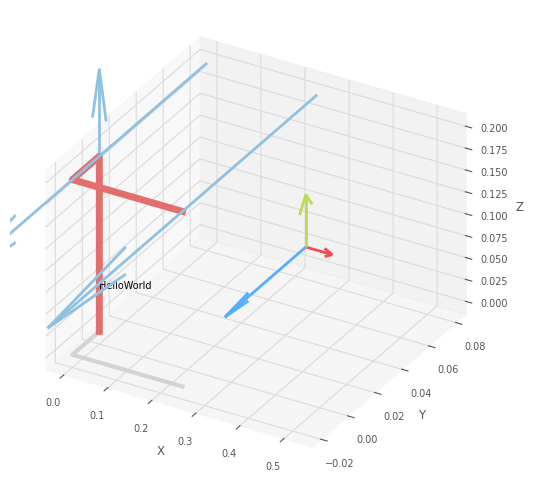

PyPlot3D backend, t = 0.1, scene:
  robot: Text(0.0, 0.0, 'HelloWorld')

<Figure size 640x480 with 0 Axes>

In [6]:
# Define the MDH Parameter
robot = rtb.DHRobot(
    [   
        rtb.RevoluteMDH(d=0.2),
        rtb.RevoluteMDH(alpha=pi/2,d=0.02),
        rtb.RevoluteMDH(a=0.25)
        
    ],tool = SE3.Tx(0.28), name="HelloWorld"
    )

# Print the MDH-Table
print(robot)

demo_q = [0,0,0,0,0,0]
robot.plot(demo_q)

## Finding Workspace

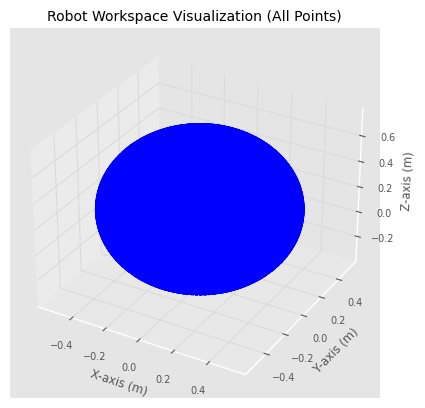

In [13]:
import numpy as np
import matplotlib.pyplot as plt


# Create a grid of joint angles for systematic sampling
n_points_per_joint = 100  # Number of points to sample per joint
q_range = np.linspace(-np.pi, np.pi, n_points_per_joint)
Q = np.meshgrid(q_range, q_range, q_range)  # Create grid for each joint
Q = np.vstack([q.flatten() for q in Q]).T  # Flatten the grid into a list of joint configurations

# Forward kinematics to calculate all end-effector positions
workspace_points = np.zeros((Q.shape[0], 3))
for i in range(Q.shape[0]):
    T = robot.fkine(Q[i, :])  # Forward kinematics for each configuration
    workspace_points[i, :] = T.t  # Get the translation (position) component

# Plot the workspace in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(workspace_points[:, 0], workspace_points[:, 1], workspace_points[:, 2], c='b', s=1, label='Workspace')
ax.set_title('Robot Workspace Visualization (All Points)')
ax.set_xlabel('X-axis (m)')
ax.set_ylabel('Y-axis (m)')
ax.set_zlabel('Z-axis (m)')
plt.show()

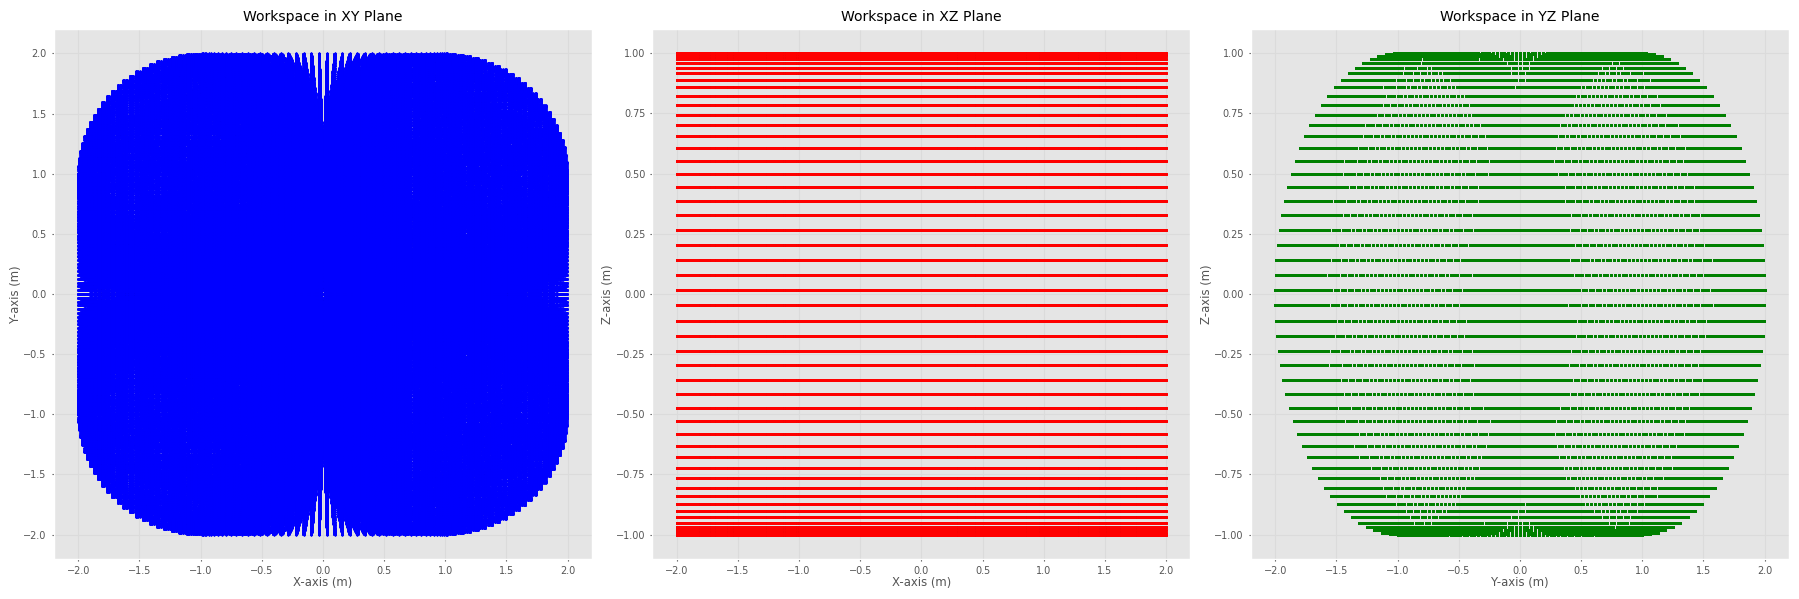

In [15]:

# XY XZ and YZ 


# Assume 'robot' is already defined in your notebook, representing the robot model
# Create a grid of joint angles for systematic sampling
n_points_per_joint = 100  # Number of points to sample per joint
q_range = np.linspace(-np.pi, np.pi, n_points_per_joint)  # Joint angles from -pi to pi
Q = np.meshgrid(q_range, q_range, q_range)  # Create grid for 3 joints (assuming 3DOF)
Q = np.vstack([q.flatten() for q in Q]).T  # Flatten the grid into a list of joint configurations

# Forward kinematics to calculate all end-effector positions
# Here, we assume robot.fkine(Q[i, :]) is the forward kinematic function giving the position (translation)
# Mock robot.fkine since the exact robot is not defined in the extracted code
def mock_fkine(q):
    # Simulate forward kinematics with simple transformation
    # A simple 3DOF system: just summing the angles to get a position for demo
    return np.array([np.cos(q[0]) + np.cos(q[1]), np.sin(q[1]) + np.sin(q[2]), np.cos(q[2])])

workspace_points = np.zeros((Q.shape[0], 3))  # Preallocate for all end-effector positions
for i in range(Q.shape[0]):
    workspace_points[i, :] = mock_fkine(Q[i, :])  # Use mock fkine for each configuration

# Now, let's plot the projections in XY, XZ, and YZ planes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# XY Plane
axs[0].scatter(workspace_points[:, 0], workspace_points[:, 1], c='b', s=1)
axs[0].set_title('Workspace in XY Plane')
axs[0].set_xlabel('X-axis (m)')
axs[0].set_ylabel('Y-axis (m)')

# XZ Plane
axs[1].scatter(workspace_points[:, 0], workspace_points[:, 2], c='r', s=1)
axs[1].set_title('Workspace in XZ Plane')
axs[1].set_xlabel('X-axis (m)')
axs[1].set_ylabel('Z-axis (m)')

# YZ Plane
axs[2].scatter(workspace_points[:, 1], workspace_points[:, 2], c='g', s=1)
axs[2].set_title('Workspace in YZ Plane')
axs[2].set_xlabel('Y-axis (m)')
axs[2].set_ylabel('Z-axis (m)')

plt.tight_layout()
plt.show()
